## Virtual SEM and EDS
Author: Kristin Makulowich, University of Toronto, November 5th, 2020

### MSE459: Lab 4 - Mechanical Attrition of Nickel Powder

Welcome to the virtual characterization component of your lab. Complete the following brief exercise to obtain the password to access the folder of SEM images and EDS spectra.

### Exercise: Identify samples using SEM images and EDS spectra

A careless researcher forgot to label their samples before loading them into the SEM and obtaining images. Using what you know about different milling conditions and the powders, help them to identify their samples. Practice adjusting the magnification, contrast and focus to get clearer images. Don't forget to run EDS to evaluate the level of contamination in the samples. This should help with the identification process. Good luck! If you get stuck, ask for a hint below.

Note: Your response will not be marked.

**If the virtual SEM does not automatically display below, click in the blank space below and press ```shift + enter```**

<IPython.core.display.Javascript object>


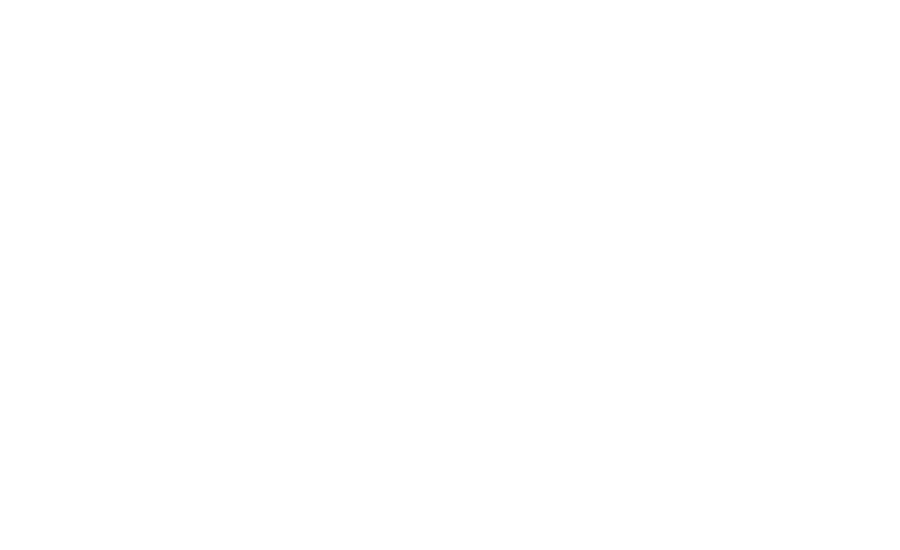

In [2]:
%matplotlib notebook
%matplotlib notebook

import VirtualSEMfuncs.SEMfuncs as sem
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.widgets import Slider, Button, RadioButtons
from time import sleep
fig1 = plt.figure(figsize=(9,5.5))
ax1 = fig1.add_subplot(1,1,1)
fig1.subplots_adjust(bottom=0.2, left=0.08)

#Initial contrast setting
vmin0 = 25
vmax0 = 130

#Initial sample
img0 = mpimg.imread('SEMimages/A1.tif')
img0=sem.adjust_contrast(img0, vmin0, vmax0)
img0 = sem.adjust_focus(img0, 3)
impgplot = plt.imshow(img0)


#Magnifification at which samples are displayed
mags = [[500, 1000, 1500, 2500], [40,50,100,100], [200, 750, 1500, 2500], [100, 230, 600, 1000], 
        [40, 85, 100, 500], [100,120,200,500]]


#Order of samples with sample names, used for assigning magnifications
sampDict = dict(zip(['D', 'F', 'A', 'C', 'B', 'E'],np.arange(6)))

ni_vals = [100, 96.5, 99.1, 100, 98.9, 99.4]
fe_vals = [0, 3.5, 0.9, 0, 1.1, 0.6]
#Graph properties
ax1.set(xticks=[], yticks=[])
ax1.text(-370, 50, 'Sample:')
ni = ax1.text(1400, 400, 'Ni: ')
fe = ax1.text(1400, 500, 'Fe: ')

# Magnification Slider
axcolor = "lightgoldenrodyellow"
axmag = plt.axes([0.25, 0.11, 0.35, 0.03], facecolor=axcolor)
smag = Slider(axmag, 'Magification', 200, 203, valinit=1, valstep=1, valfmt='%.0fx')

# Contrast Slider
axcon = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor=axcolor)
scon = Slider(axcon, 'Contrast', 0, 100, valinit=25, valstep=1, valfmt='')

#Focus slider
axfoc = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)
sfoc = Slider(axfoc, 'Focus', 0, 100, valinit=20, valstep=1, valfmt='')
  
#Radio buttons - Choose sample
#samp='D'
rax = plt.axes([0.05, 0.5, 0.1, 0.3], facecolor=axcolor)
radio1 = RadioButtons(rax, ('A', 'B', 'C', 'D', 'E', 'F'))

#EDS button
axeds = plt.axes([0.8, 0.7, 0.15, 0.1])
eds = Button(axeds, 'Run EDS')

def update(val):
    #Set image number
    mag = int(smag.val)-199
    
    #Select sample
    samp = radio1.value_selected
    
    #Actual mag value
    magVal = mags[sampDict[samp]][mag-1]
    
    #Set focus value and range
    focV = sfoc.val
    fmin = mag*3
    fmax = 15 - 3*mag
    sig = abs(fmin-(fmax+fmin)/100*focV)
    
    #Set contrast value and range
    conV = scon.val
    vmin = (100-conV)
    vmax = 255-(100-conV)
    
    #s2=radio1.value_selected
    fn = 'SEMimages/{}{}.tif'.format(samp,int(mag))
    #fn = 'SEMimages/B2.tif'
    
    smag.valtext.set_text('{}x'.format(magVal))
    img = mpimg.imread(fn)
    img = sem.adjust_contrast(img, vmin, vmax)
    img = sem.adjust_focus(img, sig)

    #Set content % back to blank    
    ni.set_text('Ni: ')
    fe.set_text('Fe: ')
    
    impgplot.set_data(img)
    fig1.canvas.draw_idle()

def run_eds(event):
    samp = radio1.value_selected
    ni_con = ni_vals[sampDict[samp]]
    fe_con = fe_vals[sampDict[samp]]
    ni.set_text('Ni: {}%'.format(ni_con))
    fe.set_text('Fe: {}%'.format(fe_con))
    
eds.on_clicked(run_eds)
    
    
smag.on_changed(update)
scon.on_changed(update)
sfoc.on_changed(update)
radio1.on_clicked(update)
plt.show()

Select your answers and submit your response when you are ready.

<IPython.core.display.Javascript object>


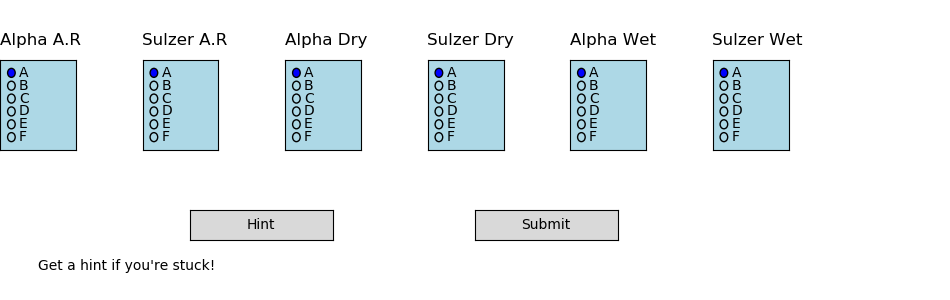

In [3]:
%matplotlib notebook
%matplotlib notebook
fig2 = plt.figure(figsize=(9.5,3))
#ax2 = fig2.add_subplot(1,1,1)
axcolor='lightblue'
#ax2 = plt.axes()
hints, sampNames, answTxt, answKey = sem.get_values()


raxA = plt.axes([0, 0.5, 0.08, 0.3], facecolor=axcolor)
rA = RadioButtons(raxA, ('A', 'B', 'C', 'D', 'E', 'F'))
raxA = plt.axes([.15, 0.5, 0.08, 0.3], facecolor=axcolor)
rB = RadioButtons(raxA, ('A', 'B', 'C', 'D', 'E', 'F'))
raxA = plt.axes([.3, 0.5, 0.08, 0.3], facecolor=axcolor)
rC = RadioButtons(raxA, ('A', 'B', 'C', 'D', 'E', 'F'))
raxA = plt.axes([.45, 0.5, 0.08, 0.3], facecolor=axcolor)
rD = RadioButtons(raxA, ('A', 'B', 'C', 'D', 'E', 'F'))
raxA = plt.axes([.6, 0.5, 0.08, 0.3], facecolor=axcolor)
rE = RadioButtons(raxA, ('A', 'B', 'C', 'D', 'E', 'F'))
raxA = plt.axes([.75, 0.5, 0.08, 0.3], facecolor=axcolor)
rF = RadioButtons(raxA, ('A', 'B', 'C', 'D', 'E', 'F'))

for i in range(6):
    plt.gcf().text(i*.15, 0.85, sampNames[i], fontsize=12)
    
txtA = plt.gcf().text(0.03, 0.4, '', color='red') 
txtB = plt.gcf().text(0.18, 0.4, '', color='red') 
txtC = plt.gcf().text(0.33, 0.4, '', color='red') 
txtD = plt.gcf().text(0.48, 0.4, '', color='red') 
txtE = plt.gcf().text(0.63, 0.4, '', color='red') 
txtF = plt.gcf().text(0.78, 0.4, '', color='red') 
    
txtHint = plt.gcf().text(0.04, 0.1, 'Get a hint if you\'re stuck!')    
#EDS button
axSub = plt.axes([0.5, 0.2, 0.15, 0.1])
subAns = Button(axSub, 'Submit')

axHint = plt.axes([0.2, 0.2, 0.15, 0.1])
hintBut = Button(axHint, 'Hint')

j=0
def submit_ans(event):
    #check answer
    answers = [rA.value_selected, rB.value_selected, rC.value_selected, rD.value_selected,
                  rE.value_selected, rF.value_selected]
    if len(answers) != len(set(answers)):
        txtHint.set_text('Responses must be unique, try again!')
    else:
        txtHint.set_text(answTxt)
        txtA.set_text(answKey[0])
        txtB.set_text(answKey[1])
        txtC.set_text(answKey[2])
        txtD.set_text(answKey[3])
        txtE.set_text(answKey[4])
        txtF.set_text(answKey[5])
    fig2.canvas.draw_idle()
def get_hint(event):
    global j
    ht = hints[j]
    j=0 if j>1 else j+1
    txtHint.set_text(ht)  
    fig2.canvas.draw_idle()
    


hintBut.on_clicked(get_hint)
subAns.on_clicked(submit_ans)


plt.show()